# Задача упаковки кругов в единичный круг
**Задача была оптимизирована**

Это двумерная задача упаковки, целью которой является упаковка в единичный круг $n$ равных друг другу кругов радиуса $r$ так, чтобы $r$ был максимальным ($r \to \max$).

Для удобства вычисления будет упаковка *единичных кругов* в как можно меньший круг радиуса $R$ $(R \to \min)$.
После всех вычислений всё будет приведено к первоначальному условию.

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

В **TABLE** представлены значения радиусов малых кругов с сайта [Packomania](http://www.packomania.com/) для первых 30 случаев (1 круг, 2 круга...) и используются для сравнения с данной программой.

In [ ]:
TABLE = np.array([
    1.000000000000000000000000000000, 0.500000000000000000000000000000, 0.464101615137754587054892683012,
    0.414213562373095048801688724210, 0.370191908158750137702237641058, 0.333333333333333333333333333333,
    0.333333333333333333333333333333, 0.302593388348611302909204224934, 0.276768653914155215717770973808,
    0.262258924190165855095630653709, 0.254854701717148909608835737700, 0.248163470571686841544054487132,
    0.236067977499789696409173668731, 0.231030727971008638446179972284, 0.221172539086390937264316484926,
    0.216664742924422421010647936933, 0.208679665570499743200080125264, 0.205604646759568224693193969093,
    0.205604646759568224693193969093, 0.195224011018748878291305694833, 0.190392146849053511968808973057,
    0.183833026581681677264411480513, 0.180336009254436500349252193252, 0.176939130595961682695732682453,
    0.173827661421222233359259594413, 0.171580252187166848283936226172, 0.169307931134573046568970317658,
    0.166252750038606935814942389058, 0.162903649276644353945069772319, 0.161349109064689865167358846536
])

В функции **cons** вычисляются ограничения для кругов (все значения массива *d* должны быть неотрицательными)

In [ ]:
def cons(a: np.ndarray) -> np.ndarray:
    r2 = (a[0] - 1)**2
    xy = [*zip(a[1::2], a[2::2])]
    return np.array(
        [r2 - x * x - y * y for x, y in xy] +
        [(x1 - x2)**2 + (y1 - y2)**2 - 4 for i, (x1, y1) in enumerate(xy, 1) for x2, y2 in xy[i:]]
        + [a[0] - 1, len(xy) - a[0]]
    )

Функция **sunflower** распределяет центры окружностей внутри круга аналогично семенам подсолнуха.

In [ ]:
def sunflower(n: int, d: float):
    from math import sqrt, sin, cos, pi
    points = []
    angle_stride =  2 * pi / ((1 + sqrt(5)) / 2)**2
    for k in range(1, n + 1):
        r = sqrt(k - 0.5) / sqrt(n - 0.5) + d / 10
        theta = k * angle_stride
        points += [r * cos(theta), r * sin(theta)]
    return points

Функция **fun** создаёт массив из $2n+1$ элементов, где $a[0]$ элемент $-$ радиус $R$, $(a[i], a[i+1]), i = 1, 3, ...,2n+1-$ координаты малых кругов.
После выполнения функции **mininize** идёт приведение к первоначальному условию.


In [ ]:
def fun(n: int, ellipse: int = 6, draw_sunflower: bool = True) -> None:
    temp = 0
    while not(0 < temp < 1.00000001):
        sf = sunflower(n, temp)
        res = minimize(lambda a: a[0], np.array([n] + sf), constraints={'type': 'ineq','fun': cons})
        x = res.x / res.x[0]
        x[0] /= res.x[0]
        temp = x[0]
    draw(n, x, sf * draw_sunflower)
    delta = x[0] / TABLE[n - 1] if x[0] < TABLE[n - 1] else TABLE[n - 1] / x[0]
    delta = round(1 - delta, ellipse) * 100
    print(f"Радиус: {x[0]:.{ellipse}}")
    print(f"Разница с табличным значением: {delta:.{ellipse}}%")

Функция **draw** отрисовывает результат вычислений программы.

In [ ]:
def draw(n: int, a: np.ndarray, sf: list) -> None:
    _, ax = plt.subplots()
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((0, 0), 1, color='r', alpha=0.5))
    for xy in zip(a[1::2], a[2::2]):
        ax.add_artist(plt.Circle(xy, a[0], alpha=0.8))
    ax.scatter(sf[::2], sf[1::2], color='y', marker='*')

Радиус: 1.0
Разница с табличным значением: 0.0%


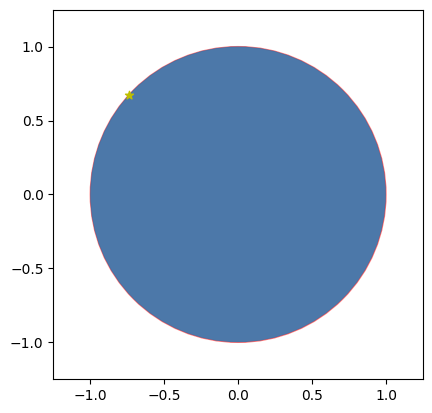

In [ ]:
fun(1)

Радиус: 0.5
Разница с табличным значением: 0.0%


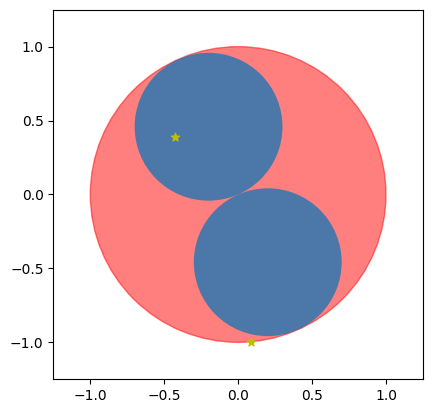

In [ ]:
fun(2)

Радиус: 0.464102
Разница с табличным значением: 0.0%


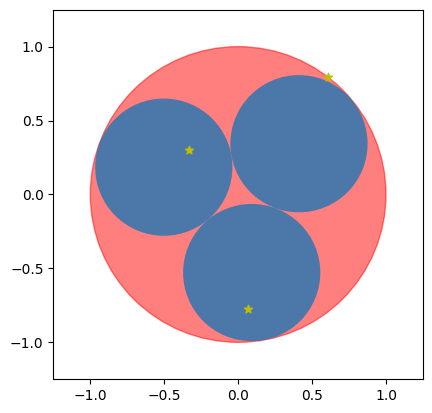

In [ ]:
fun(3)

Радиус: 0.414214
Разница с табличным значением: 0.0%


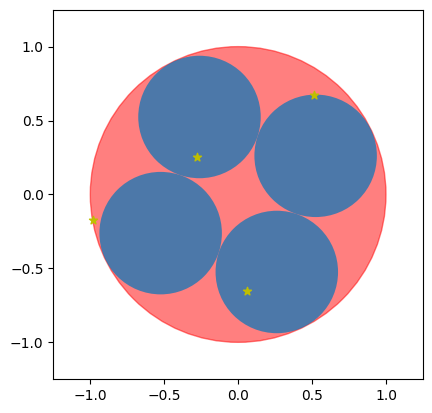

In [ ]:
fun(4)

Радиус: 0.370192
Разница с табличным значением: 0.0%


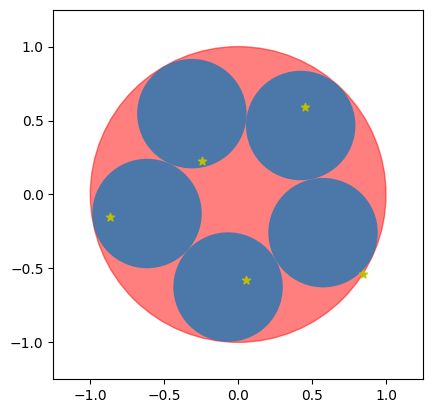

In [ ]:
fun(5)

Радиус: 0.333333
Разница с табличным значением: 0.0%


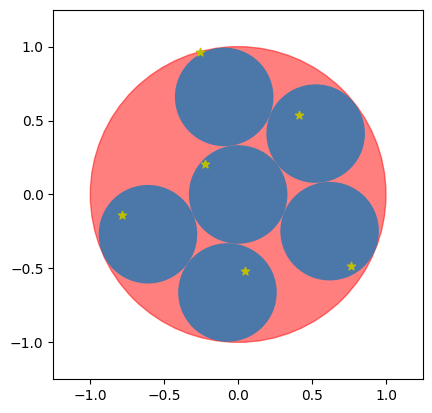

In [ ]:
fun(6)

Радиус: 0.333333
Разница с табличным значением: 0.0%


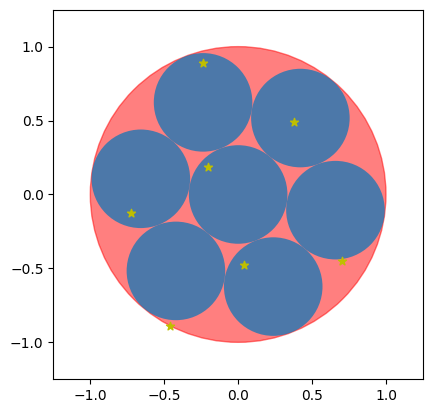

In [ ]:
fun(7)

Радиус: 0.302593
Разница с табличным значением: 0.0%


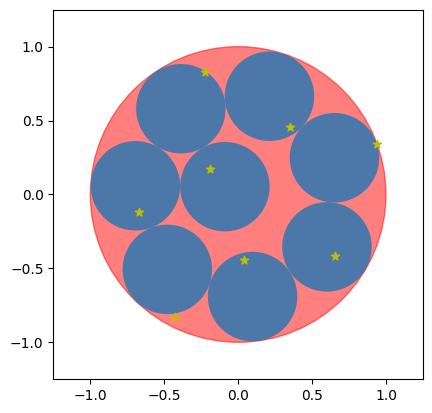

In [ ]:
fun(8)

Радиус: 0.273964
Разница с табличным значением: 1.0133%


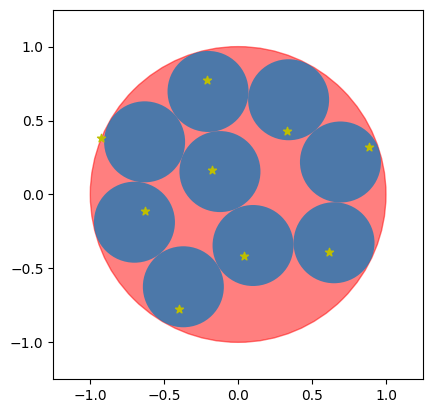

In [ ]:
fun(9)

Радиус: 0.260085
Разница с табличным значением: 0.8289%


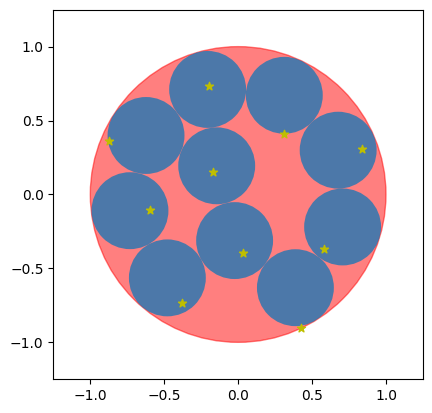

In [ ]:
fun(10)

Радиус: 0.251507
Разница с табличным значением: 1.3136%


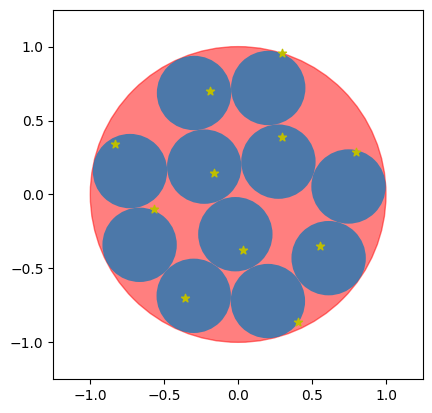

In [ ]:
fun(11)

Радиус: 0.248163
Разница с табличным значением: 0.0%


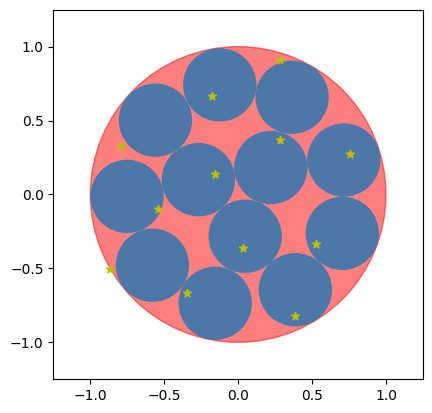

In [ ]:
fun(12)

Радиус: 0.236068
Разница с табличным значением: 0.0%


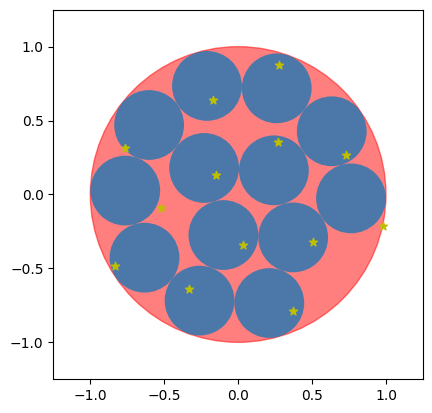

In [ ]:
fun(13)

Радиус: 0.231031
Разница с табличным значением: 0.0%


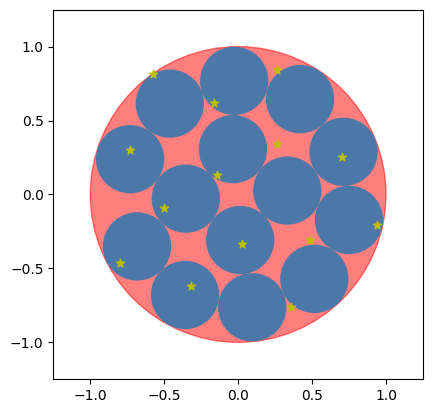

In [ ]:
fun(14)

Радиус: 0.21932
Разница с табличным значением: 0.8376%


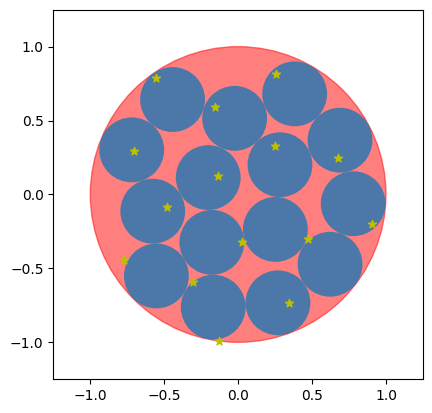

In [ ]:
fun(15)

Радиус: 0.216665
Разница с табличным значением: 0.0%


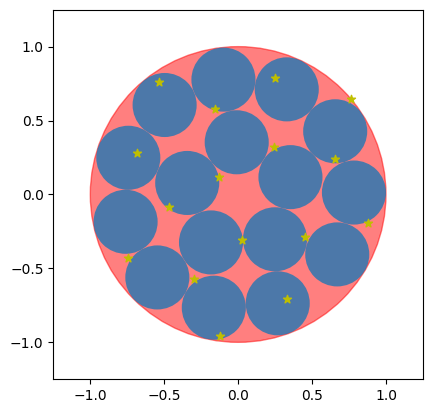

In [ ]:
fun(16)

Радиус: 0.20828
Разница с табличным значением: 0.1913%


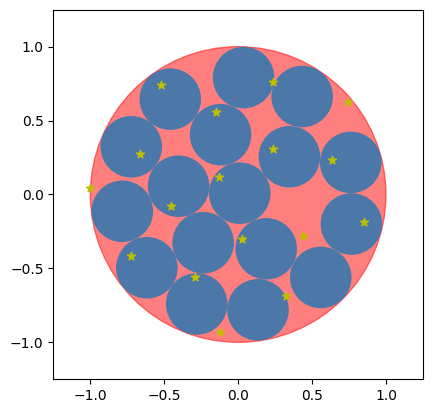

In [ ]:
fun(17)

Радиус: 0.205605
Разница с табличным значением: 0.0%


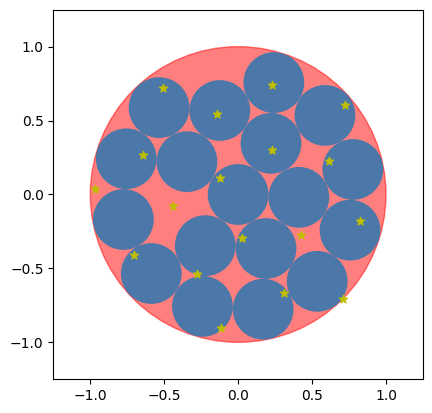

In [ ]:
fun(18)

Радиус: 0.195061
Разница с табличным значением: 5.1282%


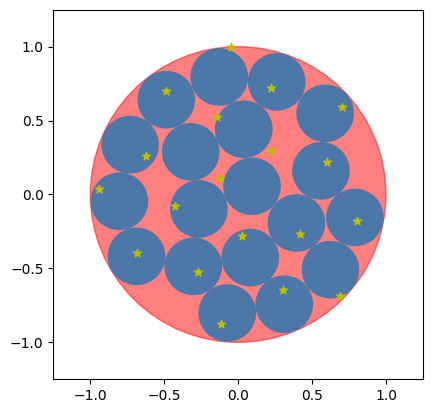

In [ ]:
fun(19)

Радиус: 0.195224
Разница с табличным значением: 0.0%


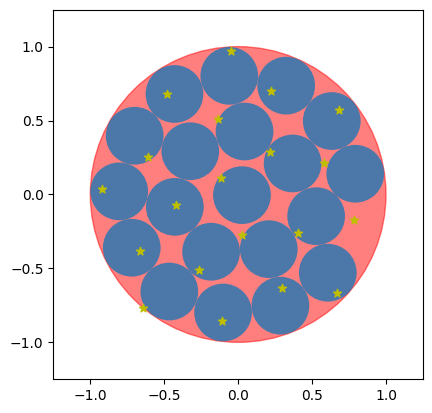

In [ ]:
fun(20)

Радиус: 0.190087
Разница с табличным значением: 0.1601%


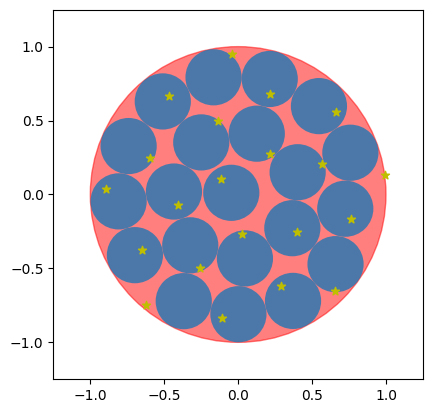

In [ ]:
fun(21)

Радиус: 0.183103
Разница с табличным значением: 0.3972%


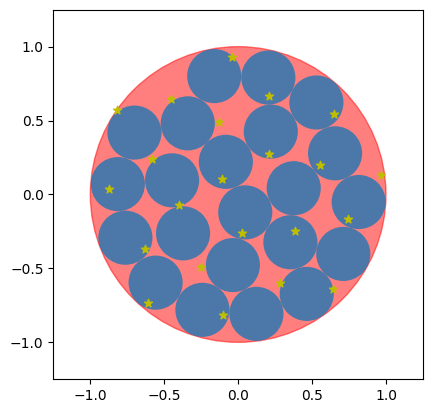

In [ ]:
fun(22)

Радиус: 0.179794
Разница с табличным значением: 0.3003%


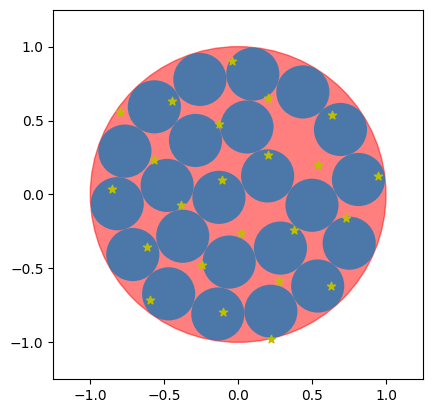

In [ ]:
fun(23)

Радиус: 0.175158
Разница с табличным значением: 1.0068%


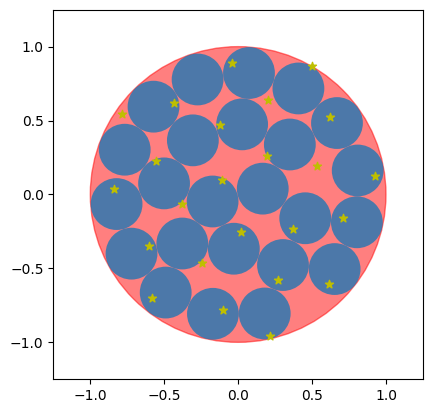

In [ ]:
fun(24)

Радиус: 0.172902
Разница с табличным значением: 0.5325%


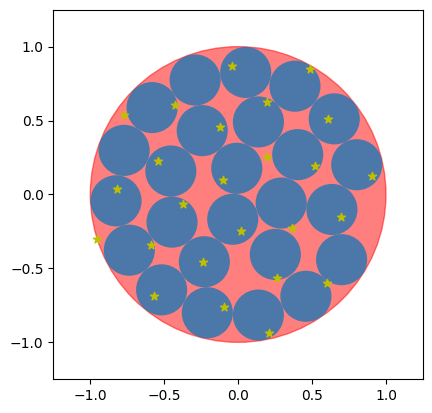

In [ ]:
fun(25)

Радиус: 0.169419
Разница с табличным значением: 1.2595%


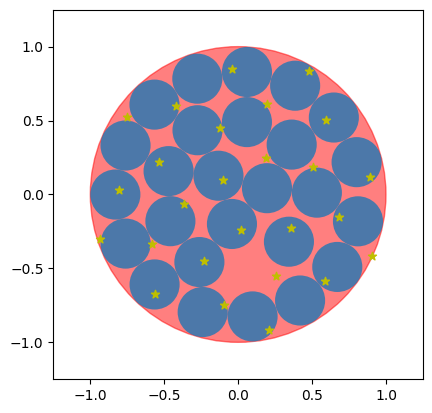

In [ ]:
fun(26)

Радиус: 0.169299
Разница с табличным значением: 0.0051%


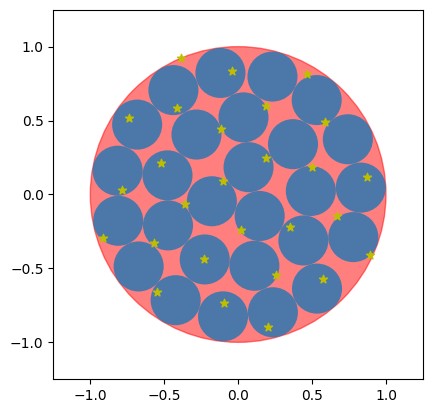

In [ ]:
fun(27)

Радиус: 0.165502
Разница с табличным значением: 0.4518%


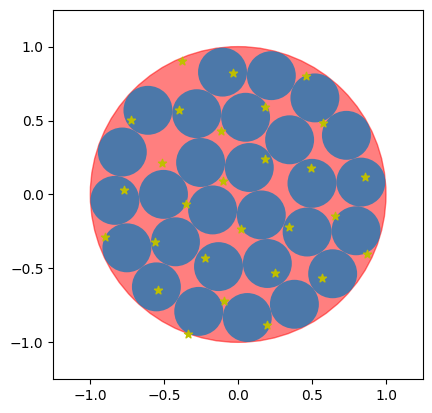

In [ ]:
fun(28)

Радиус: 0.161708
Разница с табличным значением: 0.7337%


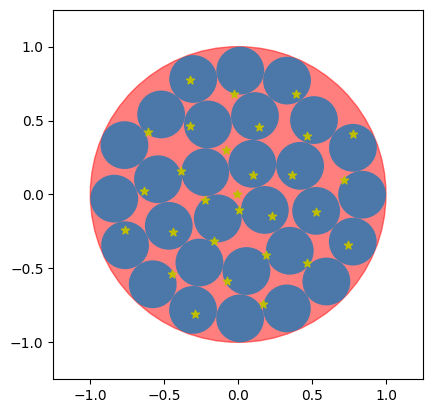

In [ ]:
fun(29)

Радиус: 0.156768
Разница с табличным значением: 2.8394%


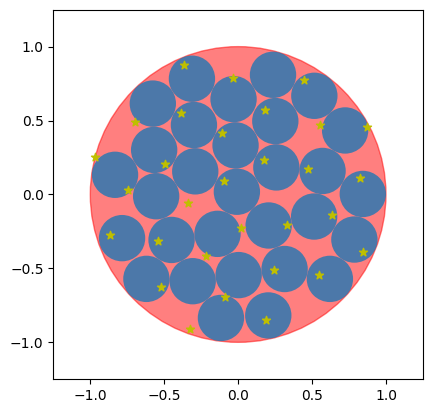

In [ ]:
fun(30)